In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
from distribuciones import espirales_anidadas

1. Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 

# Respuesta

In [3]:
df0 = espirales_anidadas(150).drop(['r','tita'],axis=1)
y0 = df0['clases']
X0 = df0.drop(['clases'],axis = 1)

df1 = espirales_anidadas(600).drop(['r','tita'],axis=1)
y1 = df1['clases']
X1 = df1.drop(['clases'],axis = 1)

df2 = espirales_anidadas(3000).drop(['r','tita'],axis=1)
y2 = df2['clases']
X2 = df2.drop(['clases'],axis = 1)

In [4]:
clf0 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf0.fit(X0.values, y0.values)

clf1 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf1.fit(X1.values, y1.values)

clf2 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf2.fit(X2.values, y2.values)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.005,
                       min_samples_leaf=5, random_state=0)

In [5]:
df_test = espirales_anidadas(10000).drop(['r','tita'],axis=1)
y_test = df_test['clases']
X_test = df_test.drop(['clases'],axis = 1)

In [6]:
y_predict0 = clf0.predict(X_test.values)
y_predict1 = clf1.predict(X_test.values)
y_predict2 = clf2.predict(X_test.values)

In [7]:
sel0, = np.where(y_predict0 == y_test.values)
sel1, = np.where(y_predict1 == y_test.values)
sel2, = np.where(y_predict2 == y_test.values)

print(len(sel0)/10000, len(sel1)/10000, len(sel2)/10000)


0.6981 0.8111 0.8717


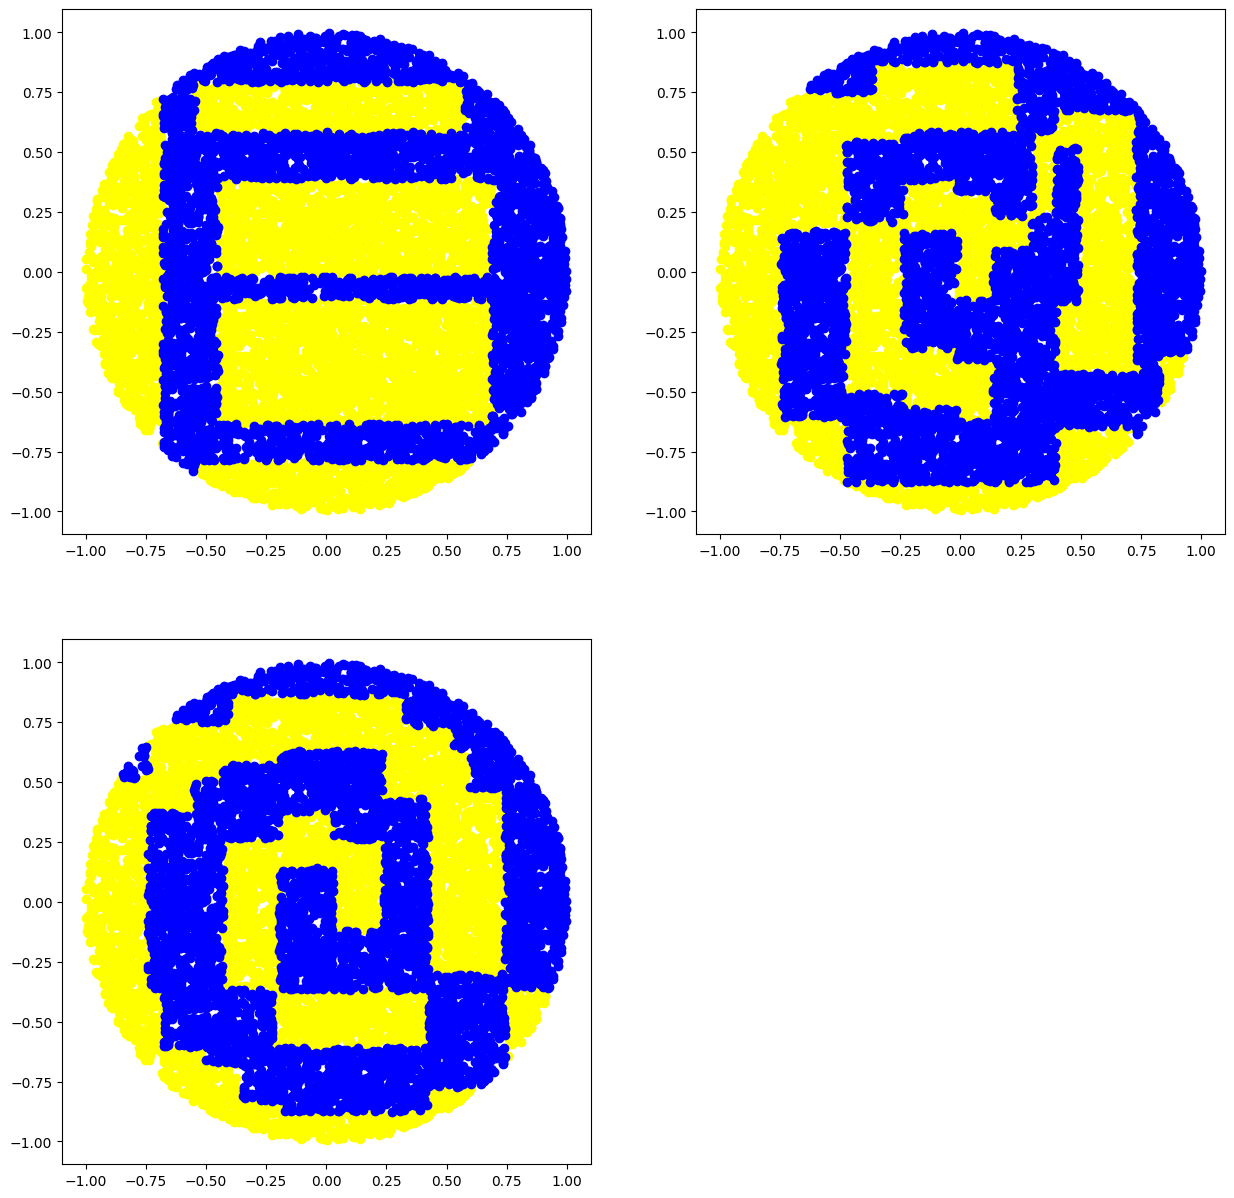

In [8]:
plt.figure(figsize=(15,15))

plt.subplot(221)
c0, = np.where(y_predict0 == 0)
c1, = np.where(y_predict0 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

plt.subplot(222)
c0, = np.where(y_predict1 == 0)
c1, = np.where(y_predict1 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

plt.subplot(223)
c0, = np.where(y_predict2 == 0)
c1, = np.where(y_predict2 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

<span style="color:green;">
   
Los porcentajes de clasificaciones correctas de las 3 espirales son 70, 83 y 88 % respectivamente. Para el ultimo caso (el de el arbol entrenado con 3000 datos) se observa que al clasificar el conjunto de test, se recupera la forma de la espiral, aunque no de una manera "suave" como es el caso original. Se puede observar como la clasificacion que realiza el arbol se hace realizando cortes en X e Y.
    
</span>